<a href="https://colab.research.google.com/github/anacarolcarrascoconsultorias-lab/IBM-Data-Science-Assignments/blob/main/Lab_23_Line_Charts_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-12-09 11:22:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  77.8MB/s    in 2.0s    

2025-12-09 11:22:16 (77.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


#**TASK 0: CLEANING AND PREPPING**

In [7]:
# Inspect the raw values of key columns
print("ConvertedCompYearly:")
display(df["ConvertedCompYearly"].head(20))
print("\nUnique non-null types:", df["ConvertedCompYearly"].dropna().apply(type).unique())

print("\nAge:")
display(df["Age"].head(20))
print("\nUnique values in Age:", df["Age"].unique()[:20])

print("\nWorkExp:")
display(df["WorkExp"].head(20))
print("\nUnique values in WorkExp:", df["WorkExp"].unique()[:20])

print("\nJobSatPoints_6:")
display(df["JobSatPoints_6"].head(20))
print("\nUnique values in JobSatPoints_6:", df["JobSatPoints_6"].unique()[:20])


ConvertedCompYearly:


,ConvertedCompYearly
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN



Unique non-null types: [<class 'float'>]

Age:


,Age
0,Under 18 years old
1,35-44 years old
2,45-54 years old
3,18-24 years old
4,18-24 years old
5,Under 18 years old
6,35-44 years old
7,18-24 years old
8,45-54 years old
9,35-44 years old



Unique values in Age: ['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']

WorkExp:


,WorkExp
0,NaN
1,17.0
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN



Unique values in WorkExp: [nan 17. 15. 12. 29. 10. 18. 16.  6.  7. 14.  3.  4.  8.  1.  9. 27. 31.
 35. 25.]

JobSatPoints_6:


,JobSatPoints_6
0,NaN
1,0.0
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN



Unique values in JobSatPoints_6: [ nan   0.  25.  30.  60. 100.  20.  50.  15.  10.   5.  80.   8.  65.
  90.  75.  35.  40.  33.  70.]


In [9]:
df_clean = df.copy()

# 1. CLEAN COMPENSATION
comp = df_clean["ConvertedCompYearly"]

# Keep only numeric, drop NaN
comp = pd.to_numeric(comp, errors="coerce").dropna()

# Remove unrealistic values (negative or > 1M)
comp = comp[(comp > 0) & (comp < 1_000_000)]

df_clean = df_clean[df_clean["ConvertedCompYearly"].isin(comp)]

# 2. CLEAN AGE CATEGORIES
valid_age_groups = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older"
]

df_clean = df_clean[df_clean["Age"].isin(valid_age_groups)]

# Order the categories properly
age_type = pd.CategoricalDtype(categories=valid_age_groups, ordered=True)
df_clean["Age"] = df_clean["Age"].astype(age_type)

# 3. CLEAN EXPERIENCE
df_clean["WorkExp"] = pd.to_numeric(df_clean["WorkExp"], errors="coerce")

# Drop unrealistic experience values
df_clean = df_clean[(df_clean["WorkExp"] >= 0) & (df_clean["WorkExp"] <= 60)]

# 4. CLEAN JOB SATISFACTION
df_clean["JobSatPoints_6"] = pd.to_numeric(df_clean["JobSatPoints_6"], errors="coerce")

# Keep 0–100 scale
df_clean = df_clean[(df_clean["JobSatPoints_6"] >= 0) & (df_clean["JobSatPoints_6"] <= 100)]

print("Cleaning complete. Preview:")
df_clean.head()


/tmp/ipython-input-3797115845.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Age"] = df_clean["Age"].astype(age_type)
/tmp/ipython-input-3797115845.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["WorkExp"] = pd.to_numeric(df_clean["WorkExp"], errors="coerce")


Cleaning complete. Preview:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,65.0,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0
392,393,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media,NaN,...,30.0,5.0,10.0,0.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,161044.0,7.0
398,399,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,30.0,10.0,30.0,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5.0


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


/tmp/ipython-input-2635290172.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Age")["ConvertedCompYearly"]


Age
Under 18 years old     17441.423077
18-24 years old        37371.276351
25-34 years old        73187.603325
35-44 years old       102148.586444
45-54 years old       112880.160594
55-64 years old       132363.929006
65 years or older     125184.054545
Name: ConvertedCompYearly, dtype: float64


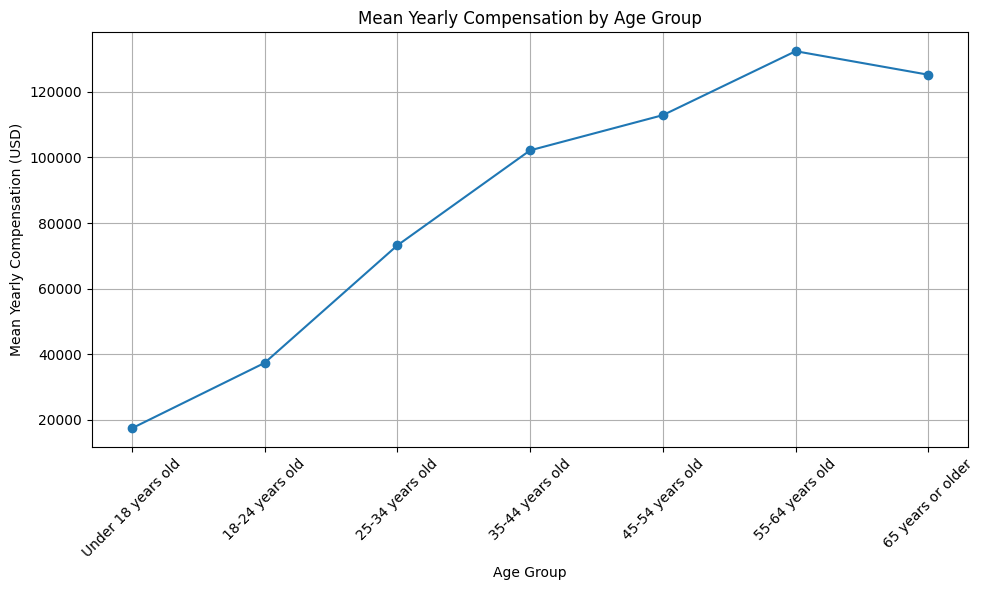

In [10]:
## Write your code here
# Task 1.1: Line Chart of MEAN ConvertedCompYearly by Age Group

# Group by Age and compute mean yearly compensation
age_comp_mean = (
    df_clean
    .groupby("Age")["ConvertedCompYearly"]
    .mean()
    .dropna()
)

print(age_comp_mean)

# Plot line chart
plt.figure(figsize=(10, 6))

plt.plot(
    age_comp_mean.index,      # x: ordered age groups
    age_comp_mean.values,     # y: mean compensation
    marker="o",
    linestyle="-"
)

plt.title("Mean Yearly Compensation by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Mean Yearly Compensation (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


/tmp/ipython-input-1205608547.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Age")["ConvertedCompYearly"]


Age
25-34 years old     73187.603325
35-44 years old    102148.586444
Name: ConvertedCompYearly, dtype: float64


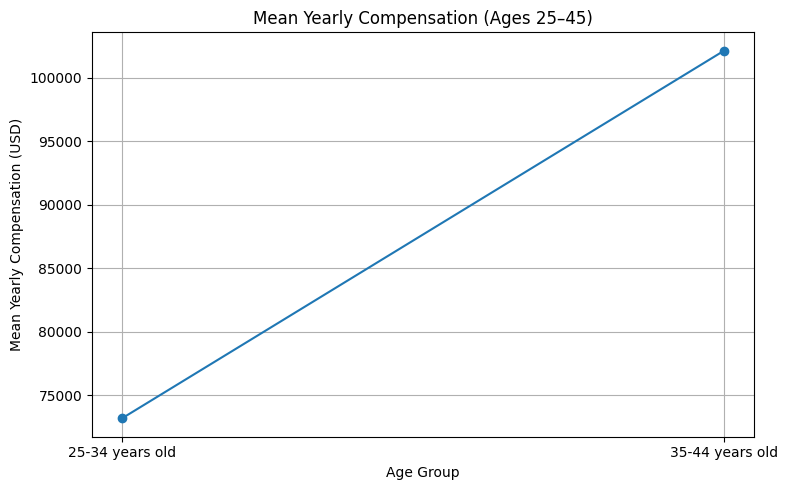

In [11]:
## Write your code here
# Task 1.2: Line Chart of Mean ConvertedCompYearly for Ages 25 to 45

age_range = ["25-34 years old", "35-44 years old"]

age_subset = (
    df_clean[df_clean["Age"].isin(age_range)]
    .groupby("Age")["ConvertedCompYearly"]
    .mean()
    .dropna()
)

print(age_subset)

plt.figure(figsize=(8, 5))
plt.plot(
    age_subset.index,
    age_subset.values,
    marker="o",
    linestyle="-"
)

plt.title("Mean Yearly Compensation (Ages 25–45)")
plt.xlabel("Age Group")
plt.ylabel("Mean Yearly Compensation (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


WorkExp
0.0     21.548780
1.0     26.481507
2.0     27.855364
3.0     26.988525
4.0     27.428713
5.0     27.705312
6.0     25.691538
7.0     26.860957
8.0     26.664000
9.0     25.192950
10.0    24.296763
11.0    24.126068
12.0    24.797376
13.0    24.477108
14.0    24.267647
15.0    23.056604
16.0    22.640244
17.0    22.455685
18.0    23.675325
19.0    23.835227
Name: JobSatPoints_6, dtype: float64


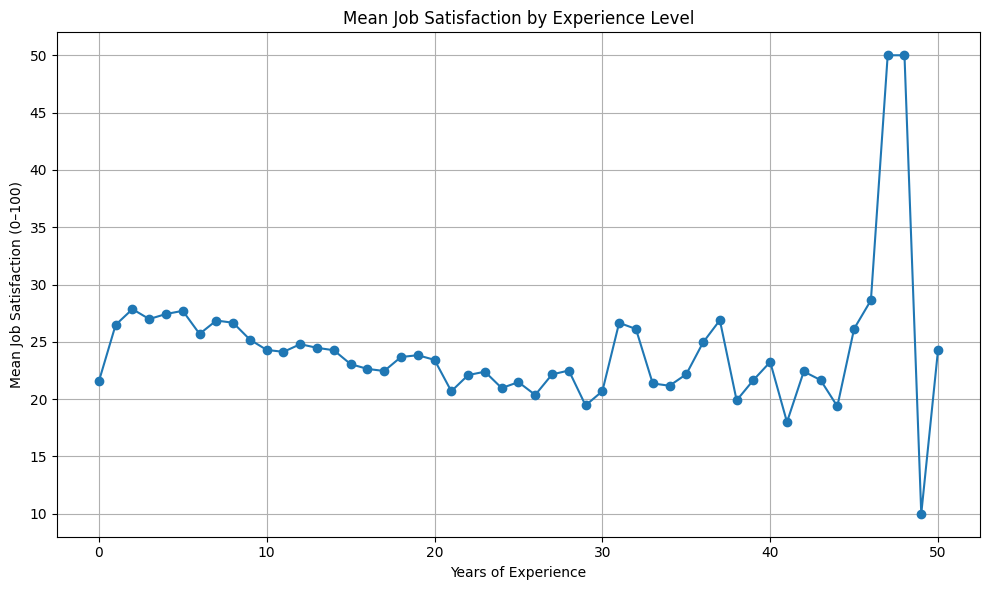

In [13]:
## Write your code here
# Task 2: Line Chart of Job Satisfaction by Experience Level

# Group by Work Experience and compute mean job satisfaction
exp_satisfaction = (
    df_clean
    .groupby("WorkExp")["JobSatPoints_6"]
    .mean()
    .dropna()
)

print(exp_satisfaction.head(20))  # quick preview

plt.figure(figsize=(10, 6))
plt.plot(
    exp_satisfaction.index,
    exp_satisfaction.values,
    marker="o",
    linestyle="-"
)

plt.title("Mean Job Satisfaction by Experience Level")
plt.xlabel("Years of Experience")
plt.ylabel("Mean Job Satisfaction (0–100)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


WorkExp
0.0      22699.475610
1.0      30453.986301
2.0      39116.209770
3.0      44613.961475
4.0      51453.777228
5.0      60510.720067
6.0      68627.794505
7.0      74193.719689
8.0      85010.780571
9.0      87432.254174
10.0     88987.976619
11.0    106500.487179
12.0     97959.075802
13.0    103103.568675
14.0    102361.258824
15.0     99925.919811
16.0    112670.981707
17.0    110116.956268
18.0    112322.308442
19.0    118358.221591
Name: ConvertedCompYearly, dtype: float64


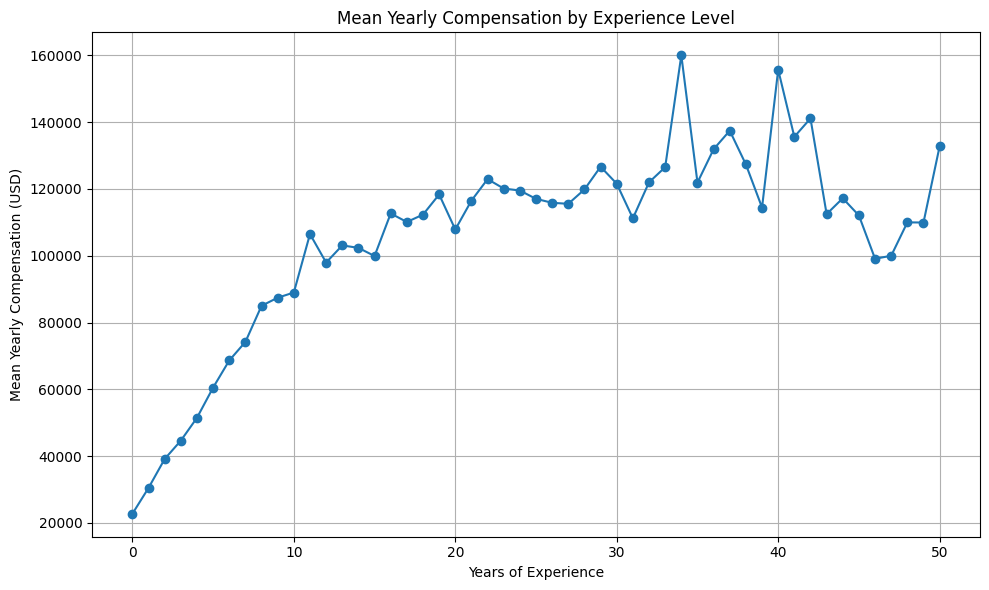

In [14]:
## Write your code here
# Task 3.1: Mean ConvertedCompYearly by Experience Level

exp_comp = (
    df_clean
    .groupby("WorkExp")["ConvertedCompYearly"]
    .mean()
    .dropna()
)

print(exp_comp.head(20))

plt.figure(figsize=(10, 6))
plt.plot(
    exp_comp.index,
    exp_comp.values,
    marker="o",
    linestyle="-"
)

plt.title("Mean Yearly Compensation by Experience Level")
plt.xlabel("Years of Experience")
plt.ylabel("Mean Yearly Compensation (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


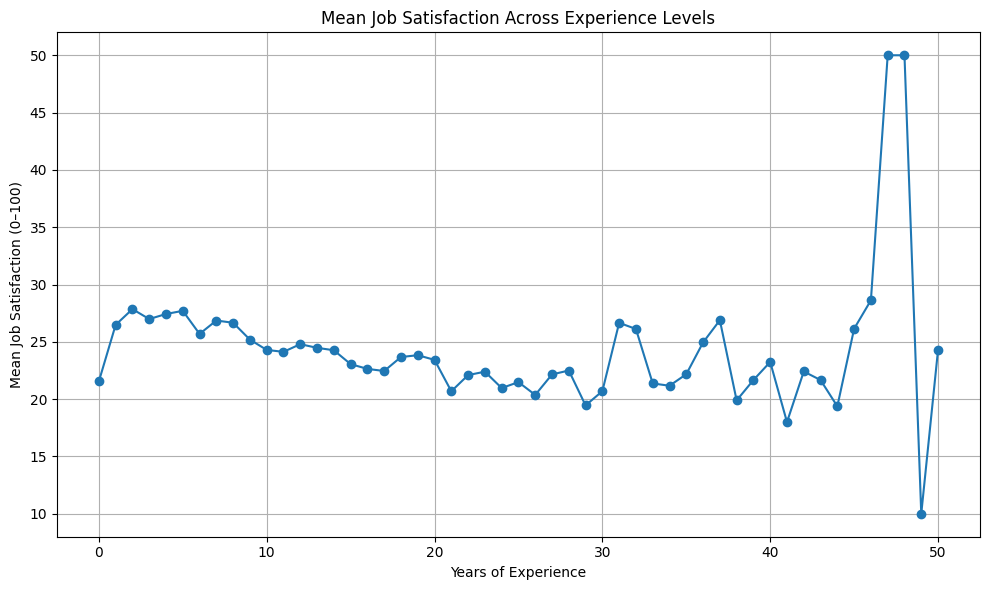

In [15]:
## Write your code here
# Task 3.2: Mean Job Satisfaction by Experience Level (Replot)

exp_satisfaction = (
    df_clean
    .groupby("WorkExp")["JobSatPoints_6"]
    .mean()
    .dropna()
)

plt.figure(figsize=(10, 6))
plt.plot(
    exp_satisfaction.index,
    exp_satisfaction.values,
    marker="o",
    linestyle="-"
)

plt.title("Mean Job Satisfaction Across Experience Levels")
plt.xlabel("Years of Experience")
plt.ylabel("Mean Job Satisfaction (0–100)")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


#**FINAL INSIGHTS**
##**Summary and Insights (Single Paragraph)**

In this lab, line charts were used to explore how compensation and job satisfaction evolve across different age groups and levels of experience. Mean yearly compensation rose consistently with age, showing a steep increase from younger respondents into mid-career groups and stabilizing at higher levels for older developers. A focused comparison of ages 25–45 confirmed this upward income trend during the core earning years. When analyzing experience level, compensation increased rapidly in the first few years of work, then settled into a stable plateau through mid-career, with fluctuations at high experience levels due to smaller sample sizes. Job satisfaction showed a different pattern: it peaked early in the career, gradually declined through mid-career, and displayed noisy variation among respondents with very high experience levels—again influenced by low sample counts. Together, these trends highlight that while compensation tends to improve steadily with age and experience, job satisfaction follows a more complex trajectory that shifts as developers progress through different career stages.

### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
